<style type="text/css">

div.h2 {
    background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;
}
    
body {
  font-size: 12px;
}    
     
                                    
                                      
div.h3 {
    color: #159957; 
    font-size: 18px; 
    margin-top: 20px; 
    margin-bottom:4px;
}
   
                                      
div.h1 {
    background-color: steelblue; 
    color: white;
    padding: 8px; 
    padding-right: 300px; 
    font-size: 32px; 
    margin-top: 20px; 
    max-width: 1500px;
    margin-bottom: 8px;
}    
</style>    
 

<div class=h1> Understand about the host</div>

Sanyanam Bhutani is the host of Chai time datascience. Let's look at some of the key aspects of things which Sanyanam Bhutani likes about his conversation


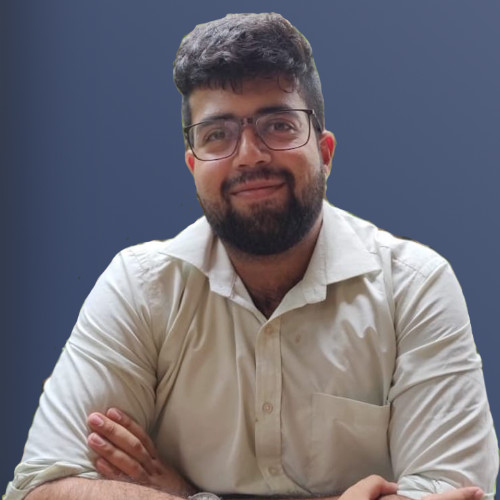

- Birthday
- Word count of best viewed speakers vs Host
- No of times Sanyanam talked vs host
- Sanyanam makes ha ha sounds etc...
- Features of Most viewed episode(not merely word clouds)
- Word Clouds of most viewed episodes
- Common words spoken by Sanyanam


<div class=h3> Acknowledgments</div>

- https://www.kaggle.com/aashita/word-clouds-of-various-shapes

<div class=h2> Importing Libraries</div>

In [35]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from PIL import Image
import re
import datetime as dt

from collections import Counter
from tqdm.notebook import tqdm
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
from wordcloud import WordCloud
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize

In [7]:
episode = pd.read_csv('../input/chai-time-data-science/Episodes.csv')
desc = pd.read_csv('../input/chai-time-data-science/Description.csv')

<div class=h2> Happy birtday host</div>

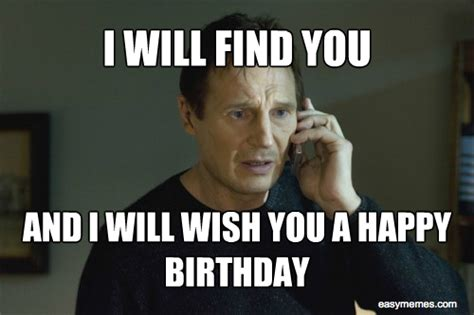



In [8]:
episode[episode['episode_id']=="E69"]["release_date"]

78    2020-05-27
Name: release_date, dtype: object

- Sanyanam conduct a special Ask me anything episode on his birthay, on finding that episode. We are able to see his birthay is 27th May.
- Our host said he had turned into ago of 23 during that episode. So his DOB is: (27/05/1997)

<div class=h3> When is the first anniversary of CTDS show ❓</div>

In [9]:
episode[episode['episode_id']=="E0"]["release_date"]

0    2019-07-21
Name: release_date, dtype: object

> So the first anniversary of CTDS show is on July 21st, 2020.

In [10]:
def get_filenames(path):
    dir_name = []
    for f_name in os.listdir(path):
        dir_name.append(f_name)
    return dir_name
li = get_filenames('../input/chai-time-data-science/Raw Subtitles/')

<div class=h2> Episode 1: Sanyam Bhutani interviews Abhishek Thakur </div>
    
<div class=h3> No of times spoken</div>

Text(0, 0.5, 'Times spoken')

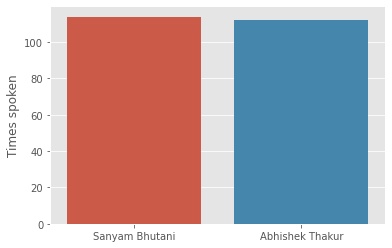

In [11]:
episode_1 = pd.read_csv('../input/chai-time-data-science/Cleaned Subtitles/E1.csv')
x=episode_1.Speaker.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('Times spoken')

<div class=h3>Number of Characters in Episode1</div>

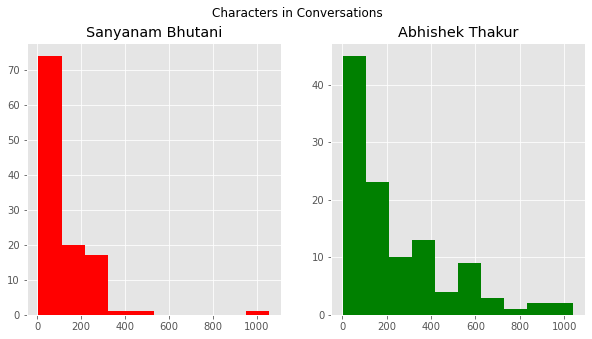

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sany_len = episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.len()
ax1.hist(sany_len,color='red')
ax1.set_title('Sanyanam Bhutani')
abhi_len = episode_1[episode_1["Speaker"]=="Abhishek Thakur"]["Text"].str.len()
ax2.hist(abhi_len,color='green')
ax2.set_title('Abhishek Thakur')
fig.suptitle('Characters in Conversations')
plt.show()


<div class=h3>Number of words in the Episode1 </div>

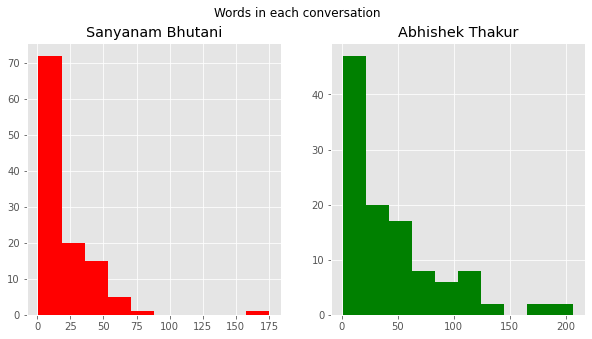

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sany_len = episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.split().map(lambda x: len(x))
ax1.hist(sany_len,color='red')
ax1.set_title('Sanyanam Bhutani')
abhi_len = episode_1[episode_1["Speaker"]=="Abhishek Thakur"]["Text"].str.split().map(lambda x: len(x))
ax2.hist(abhi_len,color='green')
ax2.set_title('Abhishek Thakur')
fig.suptitle('Words in each conversation')
plt.show()

<div class=h2> Social proof</div>

- It's very important in current world to have a very vibrant social profile to have success in the field you are working on.

In [14]:
no_twitter_followers = 8585 #from twitter profile https://twitter.com/bhutanisanyam1/
no_subscriber = episode['youtube_subscribers'].sum() + 863
# add kaggle followers
# add blog post views ~ 1M views

fig = go.Figure()

fig.add_trace(go.Indicator(
    title = 'Twitter Followers',
    mode = "number",
    value = no_twitter_followers,
    domain = {'row': 0, 'column': 0}))


fig.add_trace(go.Indicator(
    title = "Youtube subscriber",
    mode = "number",
    value = no_subscriber,
    domain = {'row': 0, 'column': 1}))



fig.update_layout(width=700,height=400,title='<b>Chai Time Data Science Stats</b>',
                  template='seaborn',margin=dict(t=60,b=10,l=10,r=10),
                  grid = {'rows': 1, 'columns': 2, 'pattern': "independent"},paper_bgcolor='#99ff66')

## What are the future plans for Chai time data science?

- what are the top enhancements or changes you're working on for CTDS? Anything to look forward to, in the near future?

In [16]:
ama_episode = pd.read_csv('../input/chai-time-data-science/Cleaned Subtitles/E69.csv')
ama_episode['Text'][1]

'The next question is from Rohan Rao who\'s a data scientist at h2o Kaggle Grand Master and also worldwide known sodoku champion, what are the top enhancements or changes you\'re working on for CTDS? Anything to look forward to, in the near future? Uh funny story. The branding idea of CTDS actually came from Rohan, thanks to his suggestion. And yes, there are a lot of exciting things that I am I\'ve been working on. So three things. I\'m launching a new podcast. Yes, a new podcast called "Chai Time Data Science News" CTDS.news. You can find another write up that will live with this blog post. You can read all about it. But the idea is to give you a short news podcast, ideally in three to five minutes, always less than 10 minutes for you to be able to be on top of data science news, basically. Now if you know me, I am completely community driven. So if you have any thoughts around around that, please let me know the first episode is supposed to go live somewhere in the first week of Jun

## Kind of Chai which host likes?


<div class=h2> Word cloud of description</div>

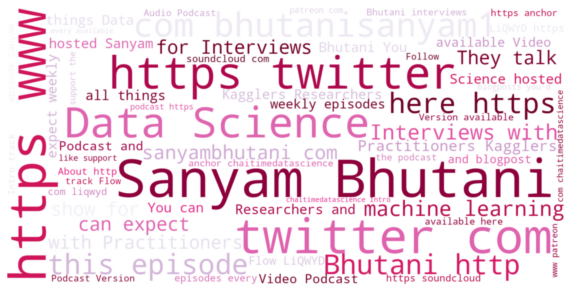

In [17]:


font = '../input/quicksandboldttf/Quicksand-Bold.ttf'
word_cloud = WordCloud(width=1600,
                       height=800,
                       colormap='PuRd', 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       min_word_length=3, # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=20,  # Font size range
                       background_color="white").generate(" ".join(desc['description']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

<div class=h2> What did Sanyam talked in most liked episodes?</div>

(not related to this analysis aspect much)

In [18]:
print(episode[episode['heroes']=='Jeremy Howard']['episode_id'])
print(episode[episode['heroes']=='Parul Pandey']['episode_id'])
print(episode[episode['heroes']=='Abhishek Thakur']['episode_id'])

27    E27
Name: episode_id, dtype: object
58    E49
Name: episode_id, dtype: object
1    E1
Name: episode_id, dtype: object


In [25]:
most_viewed_episode = ['E27.csv', 'E49.csv', 'E1.csv']
c_files = []
for f in most_viewed_episode:
    df = pd.read_csv(f'../input/chai-time-data-science/Cleaned Subtitles/{f}')
    c_files.append(df)

all_likes = pd.concat(c_files)

In [36]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = stop
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown', 'I'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
d = '../input/masks/masks-wordclouds/'


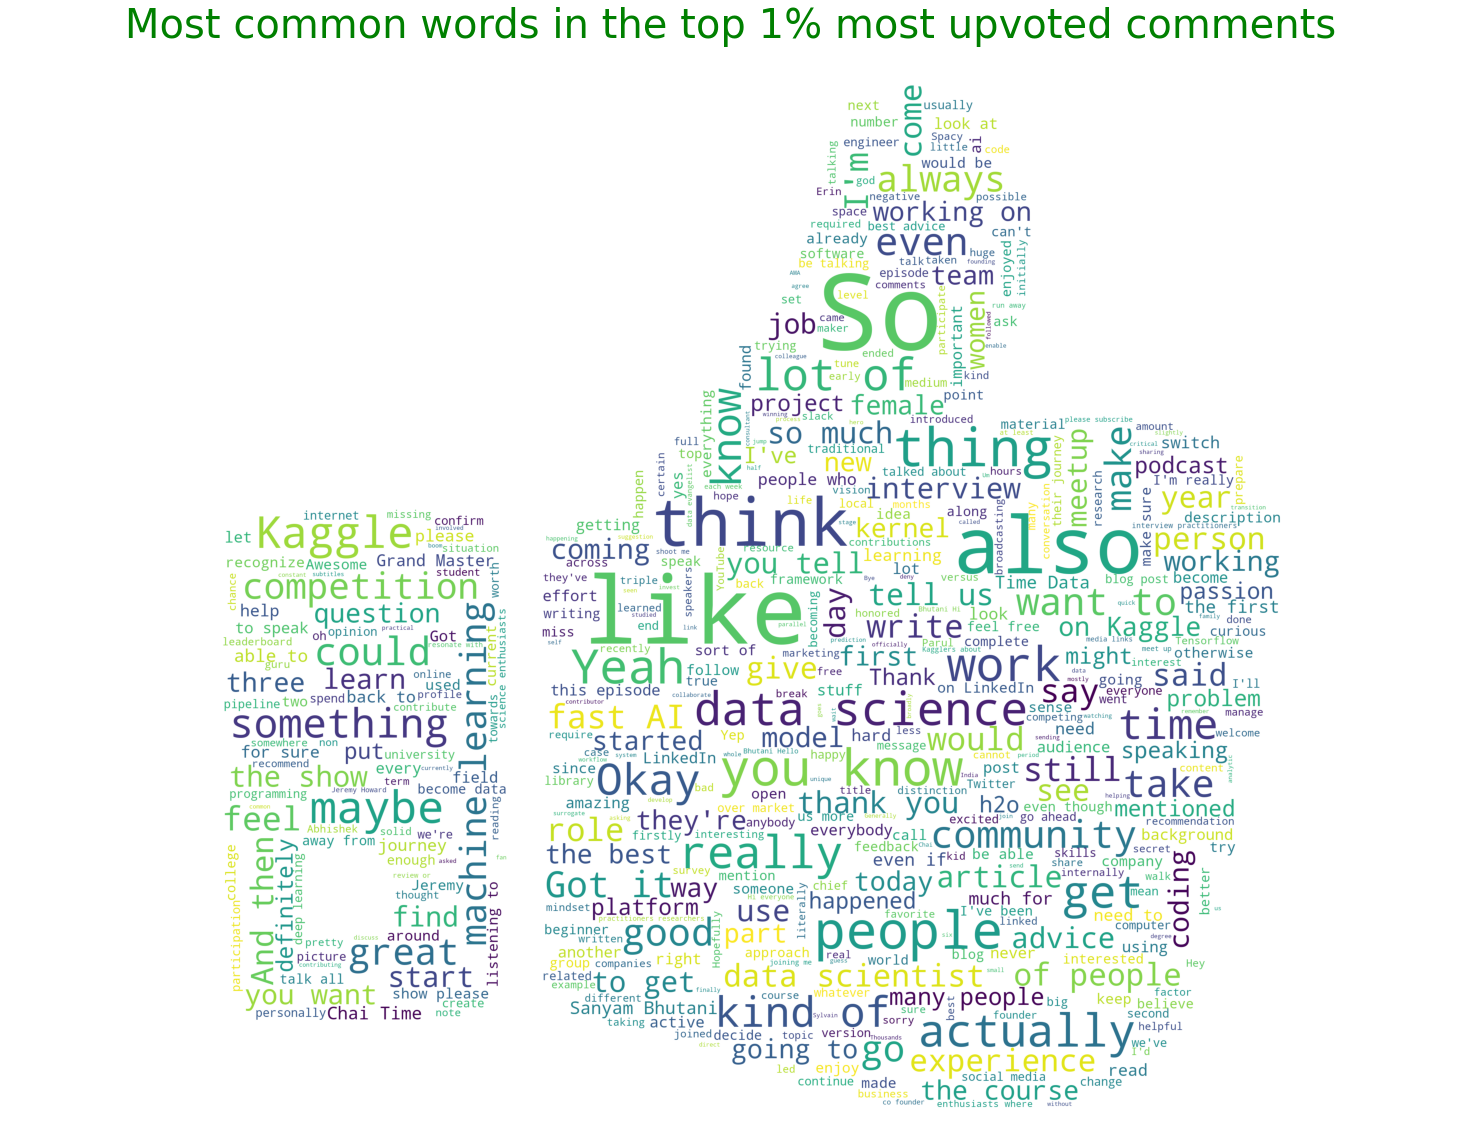

In [37]:
upvote_mask = np.array(Image.open(d + 'upvote.png'))
most_likes_text = " ".join(all_likes[all_likes['Speaker']=='Sanyam Bhutani']['Text'])
plot_wordcloud(most_likes_text, upvote_mask, max_words=500, max_font_size=300,
               title = 'Most common words in the top 1% most upvoted comments')

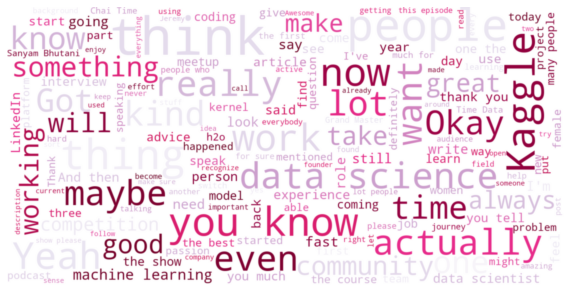

In [30]:
word_cloud = WordCloud(width=1600,
                       height=800,
                       colormap='PuRd', 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       min_word_length=3, # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=20,  # Font size range
                       background_color="white").generate(" ".join(all_likes[all_likes['Speaker']=='Sanyam Bhutani']['Text']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()


## Most common words spoken by Sanyanam

In [20]:
cleaned_st_files = os.listdir('../input/chai-time-data-science/Cleaned Subtitles/')

def add_duration(df):
    df['colon_count'] = df['Time'].str.count(':')
    df.loc[df['colon_count'] == 1, 'Time'] = '0:' + df.loc[df['colon_count'] == 1]['Time']
    df['Time_dt'] = df['Time'].apply(lambda x: dt.datetime.strptime(x, "%H:%M:%S"))
    df['Duration'] = (df['Time_dt'] - dt.datetime(1900, 1, 1)) \
        .apply(lambda x: x.total_seconds()).astype('int')
    return df

c_fs = []
for f in tqdm(cleaned_st_files):
    df = pd.read_csv(f'../input/chai-time-data-science/Cleaned Subtitles/{f}')
    df = add_duration(df)
    df['E'] = f.replace('.csv','')
    c_fs.append(df)
all_subs = pd.concat(c_fs)


In [21]:
host_subs = all_subs[all_subs['Speaker']=='Sanyam Bhutani']
host_subs['temp_list'] = host_subs['Text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in host_subs['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,you,5055
2,to,4779
3,a,3339
4,I,3315
5,and,2990
6,of,2940
7,that,2269
8,in,2071
9,for,1967
10,this,1499


In [22]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
# host_subs['Text'] = host_subs['Text'].apply(lambda x: remove_stopword(x))

In [23]:
host_subs['temp_list'] = host_subs['Text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in host_subs['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,you,5055
2,to,4779
3,a,3339
4,I,3315
5,and,2990
6,of,2940
7,that,2269
8,in,2071
9,for,1967
10,this,1499


In [38]:
# def create_corpus
corpus = []
for x in host_subs['Text'].str.split():
    for i in x:
        corpus.append(i)


# dic=defaultdict(int)
# for word in corpus:
#     if word in stop:
#         dic[word]+=1
        
# top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 


In [39]:
Counter(corpus)

Counter({'Hey,': 76,
         'this': 1499,
         'is': 1324,
         'Sanyam': 217,
         'Bhutani': 216,
         'and': 2990,
         "you're": 506,
         'listening': 156,
         'to': 4779,
         '"Chai': 224,
         'Time': 235,
         'Data': 257,
         'Science",': 57,
         'a': 3339,
         'podcast': 168,
         'for': 1967,
         'data': 621,
         'science': 301,
         'enthusiasts,': 63,
         'where': 338,
         'I': 3315,
         'interview': 327,
         'practitioners,': 58,
         'researchers,': 66,
         'Kagglers': 84,
         'about': 1319,
         'their': 196,
         'journey,': 95,
         'experience,': 96,
         'talk': 404,
         'all': 768,
         'things': 279,
         'science.': 115,
         '0:47': 7,
         'Hello,': 70,
         'welcome': 70,
         'another': 231,
         'episode': 121,
         'of': 2940,
         'the': 6139,
         'Science"': 87,
         'show.': 152,


## Most commonly used words(excluding stop words)

In [40]:
dic=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word]+=1

In [41]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:25] 

In [42]:
temp = pd.DataFrame(top)
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,So,1100
2,And,1033
3,like,1015
4,also,1012
5,think,916
6,data,621
7,one,521
8,learning,505
9,really,480
10,I'm,451


## Top stop words

In [43]:
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:25] 

<BarContainer object of 25 artists>

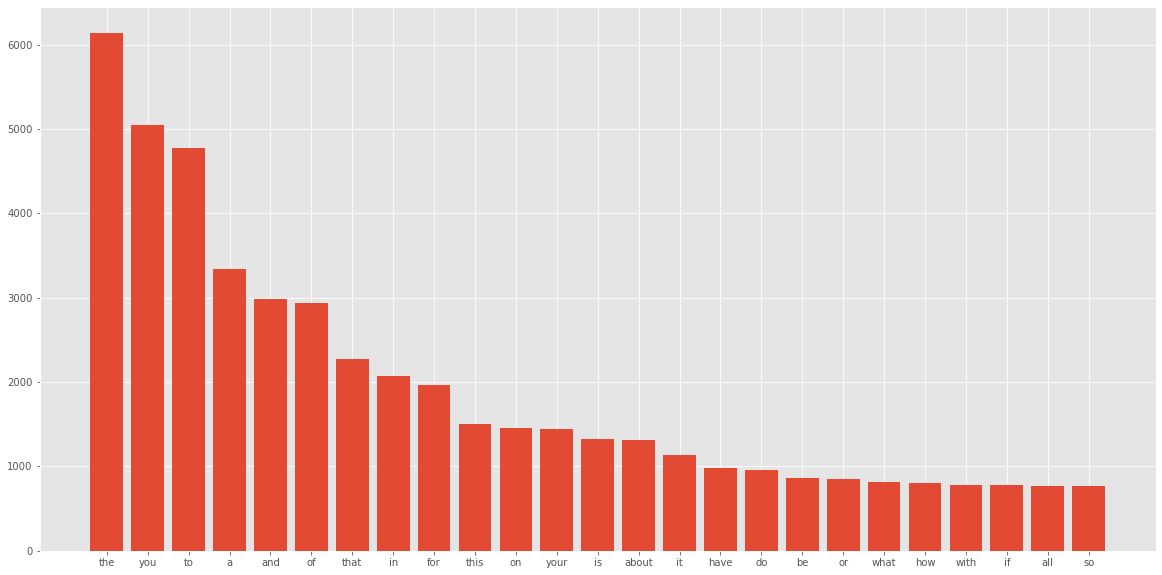

In [44]:
x,y=zip(*top)
plt.figure(figsize=(20,10))
plt.bar(x,y)


## Bi grams & trigrams

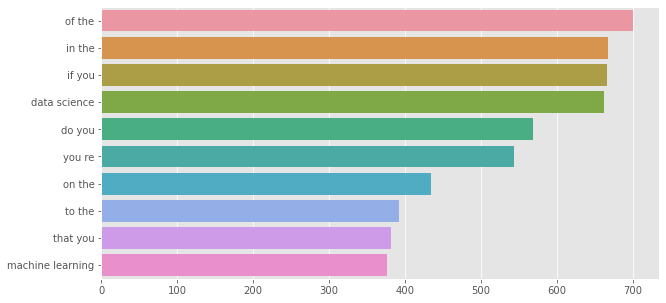

In [45]:
def get_top_word_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_word_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_word_bigrams(host_subs['Text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

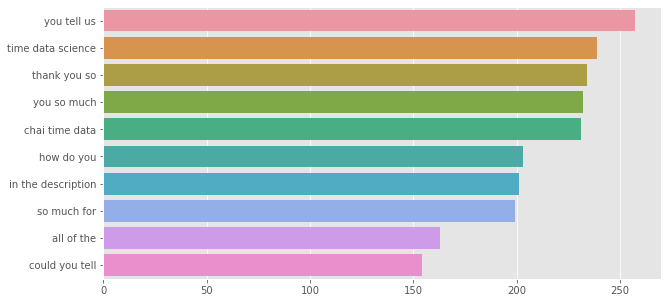

In [46]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_word_trigrams(host_subs['Text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

## Kaggle profile